# Exploring DNN learning with TensorFlow

In this assignment we'll dive a little deeper with a series of hands on exercises to better understand DNN learning with Tensorflow. Remember that if you are taking the class for a certificate we will be asking you questions about the assignment in the test!

We start by setting up the problem for you.

In [1]:
import tensorflow as tf

# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Define the base model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



4423680/4422102 [==============================] - 0s 0us/step


Neural Networks learn the best when the data is scaled / normalized to fall in a constant range. One practitioners often use is the range [0,1]. How might you do this to the training and test images used here?

*A hint: these images are saved in the standard [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) format*

In [33]:
training_images  = training_images/255.0
test_images = test_images/255.0

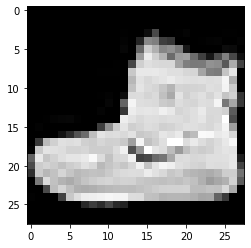

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = training_images[0]
img = Image.fromarray(img*255)
imgplot = plt.imshow(img)
plt.show()


Using these improved images lets compile our model using an adaptive optimizer to learn faster and a categorical loss function to differentiate between the the various classes we are trying to classify. Since this is a very simple dataset we will only train for 5 epochs.

In [17]:
# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model to the training data
model.fit(training_images, training_labels, epochs=5)

# test the model on the test data
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4738 - accuracy: 0.8308
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3561 - accuracy: 0.8704
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3202 - accuracy: 0.8822
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3005 - accuracy: 0.8882
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8763


[0.33315956592559814, 0.8762999773025513]

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.8648. This tells you that your neural network is about 86% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 86% of the time. But how would it work with unseen data? That's why we have the test images. We can call ```model.evaluate```, and pass in the two sets, and it will report back the loss for each. This should reach about .8747 or thereabouts, showing about 87% accuracy. Not Bad!

But what did it actually learn? If we inference on the model using ```model.predict``` we get out the following list of values. **What does it represent?**

*A hint: trying running ```print(test_labels[0])```*

In [24]:
print(test_labels[6])

4


In [25]:
classifications = model.predict(test_images)
print(classifications[0])

[1.3980915e-08 1.8826553e-08 1.3865626e-09 2.0060625e-10 3.0762251e-08
 1.2074243e-02 2.9775109e-08 4.3366052e-02 3.6821194e-07 9.4455928e-01]


Let's now look at the layers in your model. What happens if you double the number of neurons in the dense layer. What different results do you get for loss, training time etc? Why do you think that's the case? 

In [27]:
NUMBER_OF_NEURONS = 1024

# define the new model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(NUMBER_OF_NEURONS, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4721 - accuracy: 0.8307
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3593 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3210 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2965 - accuracy: 0.8899
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3371 - accuracy: 0.8776


[0.3370719850063324, 0.8776000142097473]

Consider the effects of additional layers in the network instead of simply more neurons to the same layer. First update the model to add an additional dense layer into the model between the two existing Dense layers.

In [30]:
YOUR_NEW_LAYER = tf.keras.layers.Dense(512, activation=tf.nn.relu)

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Lets then compile, fit, and evaluate our model. What happens to the error? How does this compare to the original model and the model with double the number of neurons?

In [31]:
# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4626 - accuracy: 0.8316
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3562 - accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3204 - accuracy: 0.8804
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2959 - accuracy: 0.8904
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.8811


[0.32876548171043396, 0.8810999989509583]

Before you trained, you normalized the data. What would be the impact of removing that? To see it for yourself fill in the following lines of code to get a non-normalized set of data and then re-fit and evaluate the model using this data.

In [32]:
# get new non-normalized mnist data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images_non = training_images
test_images_non = test_images

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images_non, training_labels, epochs=5)
model.evaluate(test_images_non, test_labels)
classifications = model.predict(test_images_non)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 1.3347 - accuracy: 0.7307
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5389 - accuracy: 0.8105
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4880 - accuracy: 0.8301
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4517 - accuracy: 0.8424
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4255 - accuracy: 0.8522


Sometimes if you set the training for too many epochs you may find that training stops improving and you wish you could quit early. Good news, you can! TensorFlow has a function called ```Callbacks``` which can check the results from each epoch. Modify this callback function to make sure it exits training early but not before reaching at least the second epoch!

*A hint: logs.get(METRIC_NAME) will return the value of METRIC_NAME at the current step*

In [44]:
# define and instantiate your custom Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if( epoch>=2 and logs.get('accuracy')>0.86 ):
      self.model.stop_training = True
callbacks = myCallback()

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(512, activation=tf.nn.relu),
                            YOUR_NEW_LAYER,
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
      loss = 'sparse_categorical_crossentropy',
      metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4681 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3565 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3201 - accuracy: 0.8817
